In [10]:
import numpy as np
import nibabel
import nilearn
from nilearn.image import resample_to_img
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.plotting import show
from nilearn.plotting import plot_roi
from nilearn import image
from nilearn.image import load_img
from nilearn.masking import intersect_masks
import numpy as np
import nibabel as nib
import nilearn
from nilearn.image import resample_to_img
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.plotting import show
from nilearn.plotting import plot_roi
from nilearn import image
from nilearn.masking import apply_mask
# get_ipython().magic('matplotlib inline')
import scipy
import matplotlib
import matplotlib.pyplot as plt
from nilearn import image
from nilearn.input_data import NiftiMasker
#from nilearn import plotting
import nibabel
from nilearn.masking import apply_mask
from nilearn.image import load_img
from nilearn.image import new_img_like
from nilearn.input_data import NiftiMasker,  MultiNiftiMasker
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, metrics
from sklearn.linear_model import Ridge
from sklearn.svm import SVC, LinearSVC
from sklearn.cross_validation import KFold
from sklearn.cross_validation import LeaveOneLabelOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import SelectFwe
from scipy import signal
from scipy.fftpack import fft, fftshift
from scipy import interp

params = {'legend.fontsize': 'large',
          'figure.figsize': (5, 3),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
font = {'weight': 'bold',
        'size': 22}
plt.rc('font', **font)
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif, GenericUnivariateSelect, SelectKBest, chi2
from sklearn.feature_selection import RFE
import os
import seaborn as sns
import pandas as pd
import csv
from scipy import stats
import brainiak
import brainiak.funcalign.srm


In [11]:
projectDir='/jukebox/norman/amennen/prettymouth_fmriprep2/'
templateImg='/jukebox/norman/amennen/MNI_things/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c.nii'
DMN_mask='/jukebox/norman/amennen/MNI_things/Yeo_JNeurophysiol11_MNI152/Yeo_Network7mask_reoriented.nii.gz'
exfunctional= projectDir + 'derivatives/fmriprep/sub-039/func/sub-039_task-prettymouth_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
TOM_large=projectDir + 'ROI/theory_mind_thr1.645_bin.nii.gz'
TOM_cluster=projectDir + 'ROI/top10clusters.nii.gz'
fmriprep_dir=projectDir + '/derivatives/fmriprep'

# to do: threshold and then binarize

In [12]:
# first go through all subjects used and make an average BOLD-MNI space brain mask
# load subject numbers
subInd = 0
nsub=38
allnames = []
allgroups = []
groupInfo={}
# skip subjects 039 and 116
with open(projectDir + 'participants.tsv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if 'sub' in row[0]:
            # now skip the subjects we don't want to analyze
            allInfo = row[0].split('\t')
            subjName=allInfo[0]
            if subjName != 'sub-039' and subjName != 'sub-116':
                if allInfo[3] == 'paranoia':
                    group = 0
                elif allInfo[3] == 'affair':
                    group = 1
                allnames.append(subjName)
                allgroups.append(group)
                subInd+=1

In [7]:
nSub = 38
mask_imgs = []
for s in np.arange(nSub):
    #print(s)
    subjName=allnames[s]
    print(subjName)
    mask_name=fmriprep_dir + '/' + subjName + '/' + 'func' + '/' + subjName + '_task-prettymouth_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    mask_imgs.append(mask_name)
avg_mask = intersect_masks(mask_imgs,threshold=1,connected=True)
fn = projectDir + 'ROI/AVG_task-prettymouth_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
avg_mask.to_filename(fn)


sub-088
sub-089
sub-090
sub-091
sub-092
sub-093
sub-094
sub-095
sub-096
sub-097
sub-098
sub-099
sub-100
sub-101
sub-102
sub-103
sub-104
sub-105
sub-106
sub-107
sub-108
sub-109
sub-110
sub-111
sub-068
sub-081
sub-112
sub-053
sub-113
sub-031
sub-114
sub-115
sub-117
sub-118
sub-119
sub-120
sub-121
sub-122


In [8]:
avg_maskname = projectDir + 'ROI/AVG_task-prettymouth_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

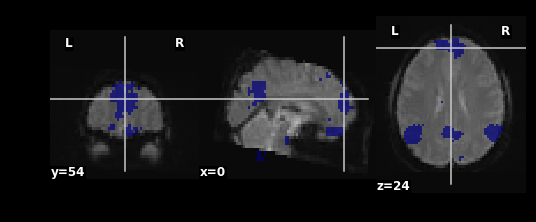

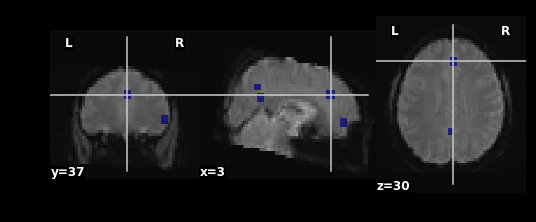

In [9]:
# first resample the two diffrent masks to match the functional slicing
TOM_large_img = load_img(TOM_large)
TOM_cluster_img = load_img(TOM_cluster)
functional_img = load_img(exfunctional)
resampled_TOM_large = resample_to_img(TOM_large_img,exfunctional,interpolation='nearest')
resampled_TOM_cluster = resample_to_img(TOM_cluster_img,exfunctional,interpolation='nearest')
first_rsn = image.index_img(functional_img, 0)

plot_roi(resampled_TOM_large,first_rsn)
plot_roi(resampled_TOM_cluster,first_rsn)
fn_large = projectDir + 'ROI/TOM_large_resampled.nii.gz'
fn_cluster = projectDir + 'ROI/TOM_cluster_resampled.nii.gz'
resampled_TOM_large.to_filename(fn_large)
resampled_TOM_cluster.to_filename(fn_cluster)